In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('petr4_treinamento.csv')
base.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0


In [13]:
base.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
1242,2017-12-27,15.99,16.139999,15.98,16.049999,16.017963,23552200.0
1243,2017-12-28,16.10,16.129999,16.00,16.100000,16.067865,19011500.0
1244,2017-12-29,16.10,16.100000,16.10,16.100000,16.067865,0.0


In [3]:
base = base.dropna()
base_treinamento = base.iloc[:, 1:2].values

In [8]:
base_treinamento.shape

(1242, 1)

In [4]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [5]:
previsores = []
preco_real = []
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i, 0])
    preco_real.append(base_treinamento_normalizada[i, 0])
previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores.shape

(1152, 90)

In [6]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(1152, 90, 1)

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 90, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 50)            30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [9]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 5s 147ms/step - loss: 0.0357 - mean_absolute_error: 0.1346
Epoch 2/100
36/36 [==============================] - 5s 143ms/step - loss: 0.0167 - mean_absolute_error: 0.1000
Epoch 3/100
36/36 [==============================] - 5s 141ms/step - loss: 0.0148 - mean_absolute_error: 0.0954
Epoch 4/100
36/36 [==============================] - 5s 138ms/step - loss: 0.0117 - mean_absolute_error: 0.0840
Epoch 5/100
36/36 [==============================] - 5s 140ms/step - loss: 0.0099 - mean_absolute_error: 0.0752
Epoch 6/100
36/36 [==============================] - 5s 140ms/step - loss: 0.0092 - mean_absolute_error: 0.0723
Epoch 7/100
36/36 [==============================] - 5s 137ms/step - loss: 0.0087 - mean_absolute_error: 0.0719
Epoch 8/100
36/36 [==============================] - 5s 137ms/step - loss: 0.0077 - mean_absolute_error: 0.0674
Epoch 9/100
36/36 [==============================] - 5s 137ms/step - loss: 0.0072 - mean_absolute_error:

In [10]:
base_teste = pd.read_csv('petr4_teste.csv')
base_teste.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900


In [12]:
base_teste.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2018-01-29,19.67,20.049999,19.570000,19.850000,19.810381,55726200
20,2018-01-30,19.77,19.770000,19.360001,19.490000,19.451097,46203000
21,2018-01-31,19.74,19.930000,19.680000,19.700001,19.660681,41576600


In [24]:
base_teste.shape

(22, 7)

In [11]:
preco_real_teste = base_teste.iloc[:, 1:2].values

In [16]:
base.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0


In [14]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
base_completa.head(3)

0    19.990000
1    19.809999
2    20.330000
Name: Open, dtype: float64

In [15]:
base_completa.tail(3)

19    19.67
20    19.77
21    19.74
Name: Open, dtype: float64

In [17]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [18]:
entradas.shape

(112, 1)

In [19]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste.shape

(22, 90)

In [20]:
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))
X_teste.shape

(22, 90, 1)

In [21]:
previsoes = regressor.predict(X_teste)
previsoes.shape

(22, 1)

In [22]:
previsoes = normalizador.inverse_transform(previsoes)

In [23]:
print(previsoes.mean())
print(preco_real_teste.mean())

17.121475
17.87454563636364


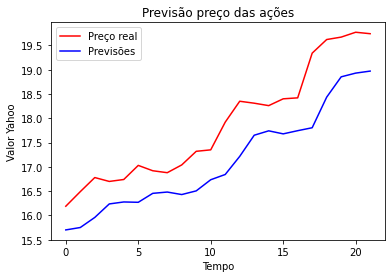

In [25]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()